## ANÁLISIS MULTIVARIANTE

El análisis multivariante se utiliza para explorar y comprender las relaciones complejas entre múltiples variables. Proporciona información valiosa para la toma de decisiones y la comprensión de los datos en diversas áreas de estudio.

Algunas de las aplicaciones comunes del análisis multivariante incluyen:

1. Análisis de componentes principales (PCA): Es una técnica que reduce la dimensionalidad de un conjunto de datos al transformar las variables originales en un conjunto más pequeño de componentes principales. Ayuda a identificar las variables más importantes y a visualizar la estructura del conjunto de datos.

2. Análisis de cluster: Permite agrupar objetos o individuos similares en grupos homogéneos según sus características. Ayuda a identificar patrones y segmentos en los datos.

3. Análisis de regresión múltiple: Examina la relación entre una variable dependiente y varias variables independientes. Ayuda a comprender el impacto de las variables independientes en la variable dependiente y a predecir valores futuros.

4. Análisis discriminante: Permite clasificar objetos en diferentes grupos basándose en un conjunto de variables predictoras. Ayuda a identificar las variables más discriminantes y a predecir la pertenencia a un grupo.

5. Análisis de series temporales: Examina las relaciones y patrones en datos secuenciales a lo largo del tiempo. Ayuda a predecir tendencias y patrones futuros.

6. Análisis de correspondencias: Explora las relaciones entre variables categóricas. Ayuda a identificar asociaciones y patrones entre las categorías.

## 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import locale

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

## 2. Cargar datos

In [3]:
ruta = '../data/calidad_aire_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [4]:
# Transformar las columnas a númericas para que en las gráficas se muestren en el formato correcto

df['ANO'] = df['ANO'].astype(int)
df['MES'] = df['MES'].astype(int)
df['DIA'] = df['DIA'].astype(int)
df['HORA'] = df['HORA'].astype(int)

df.dtypes

FECHA           object
ANO              int32
MES              int32
DIA              int32
HORA             int32
DIA_SEMANA      object
ESTACION       float64
SO2            float64
CO             float64
NO2            float64
PM2.5          float64
PM10           float64
O3             float64
BTX            float64
TEMPERATURA    float64
HUMEDAD        float64
ICA_SO2        float64
ICA_PM10       float64
ICA_O3         float64
ICA_NO2        float64
ICA            float64
dtype: object

#### 3. Relaciones entre más de tres variables

##### 3.1. Matriz de Correlación

Muestra las correlaciones entre todas las variables en un conjunto de datos. 

Comprender las relaciones entre las variables e identificar patrones y asociaciones en los datos.

En la matriz de correlación, cada variable se representa en las filas y columnas de la matriz. Los valores de la matriz representan el coeficiente de correlación entre pares de variables. El coeficiente de correlación puede variar entre -1 y 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica una falta de correlación.

La matriz de correlación es útil para identificar las variables que están altamente correlacionadas entre sí. Esto puede ayudar a detectar multicolinealidad (alta correlación entre predictores) en un modelo de regresión, lo que puede afectar la interpretación de los coeficientes y la precisión del modelo.

Además, la matriz de correlación puede ser utilizada para seleccionar variables relevantes en un análisis multivariante. Si hay variables altamente correlacionadas, puede ser posible eliminar una de ellas sin perder información significativa.

In [5]:
# Se eliminan las columnas númericas que no interesan para las estadisticas 
df_rel = df.drop(['FECHA','ANO','MES','DIA','HORA','ESTACION','ICA_SO2','ICA_PM10','ICA_O3','ICA_NO2'],axis=1)
df_rel.head(2)

,DIA_SEMANA,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA
0,Martes,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,45.22
1,Martes,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,45.64


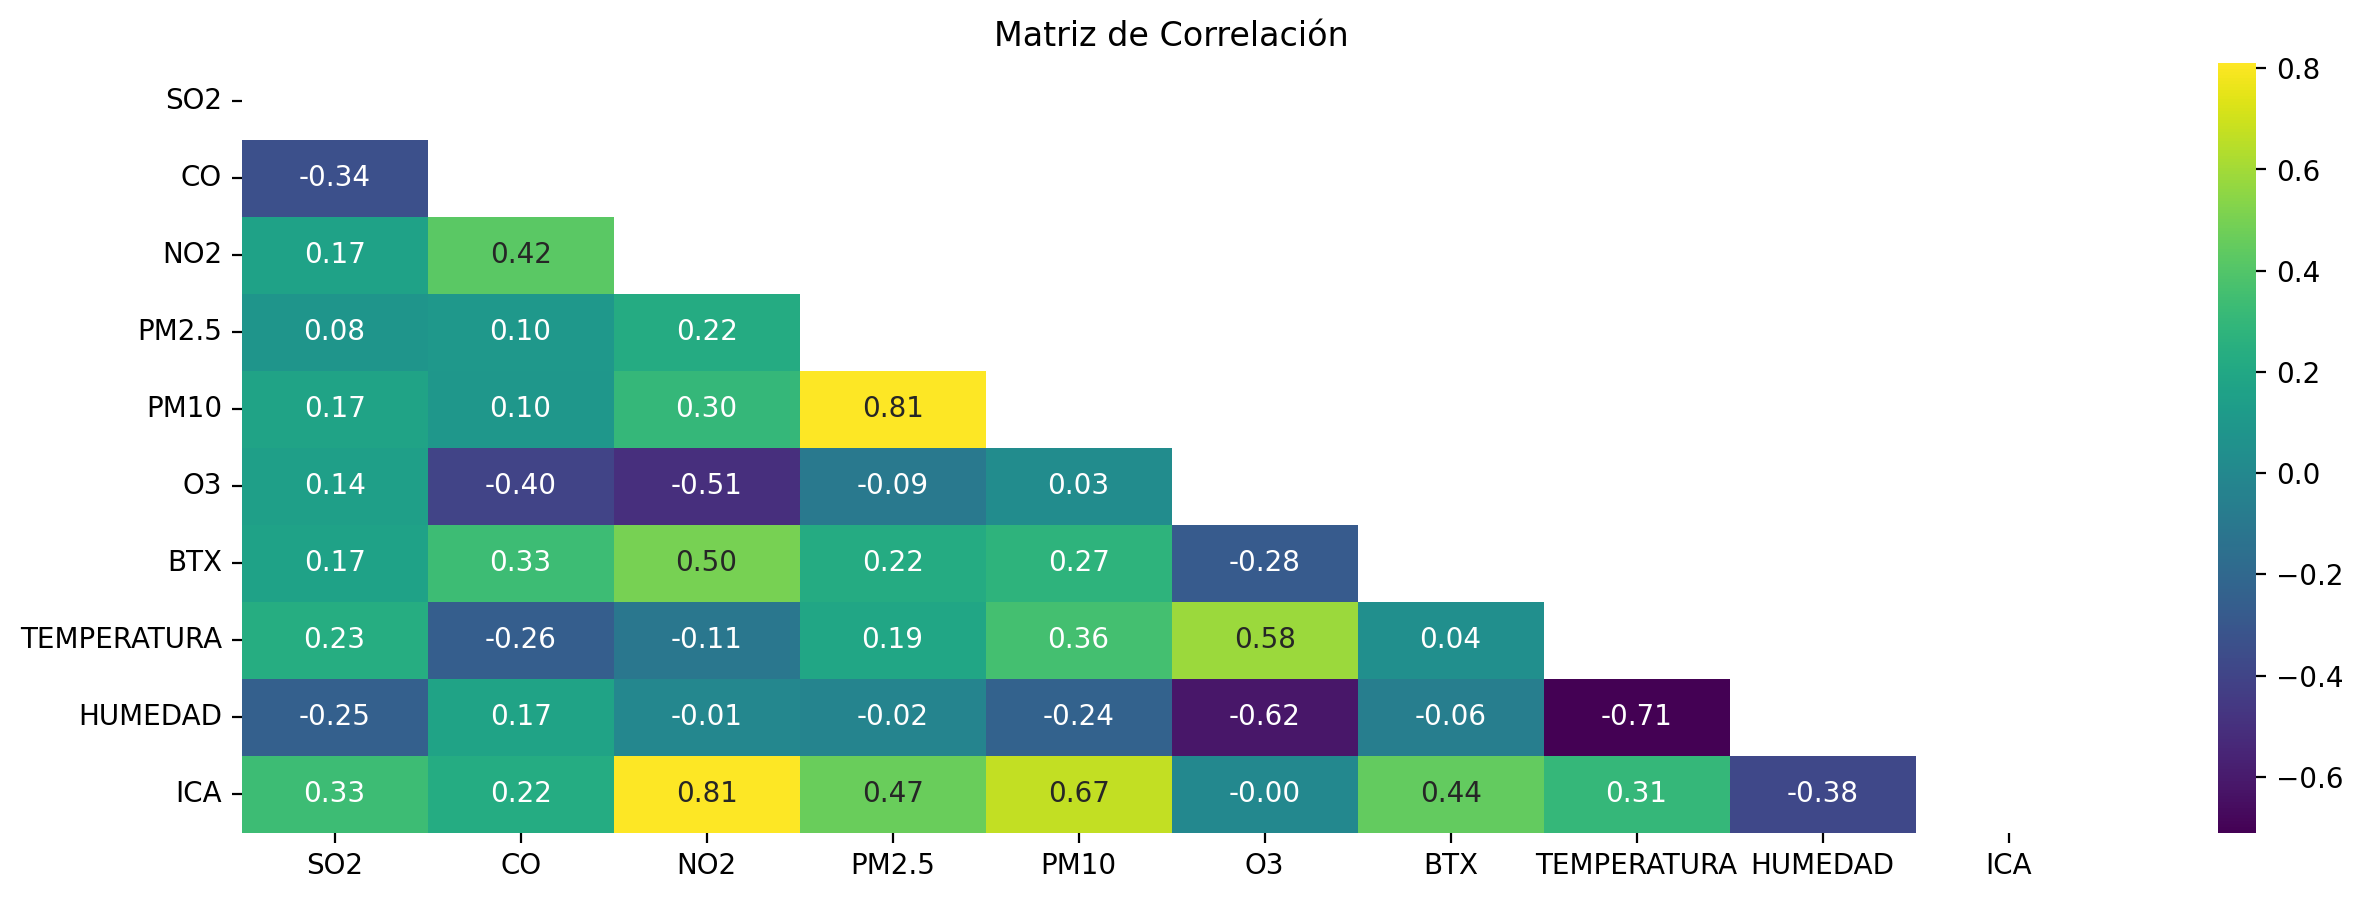

In [6]:
plt.figure(figsize=(15, 5), dpi=200)

df_corr = df_rel.corr(numeric_only=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # np.triu para el triángulo superior
sns.heatmap(df_corr, annot=True, cmap="viridis", mask=mask, fmt=".2f")

plt.title('Matriz de Correlación')

plt.show()

##### 3.2. Gráfica de Barras Matriz de Correlación

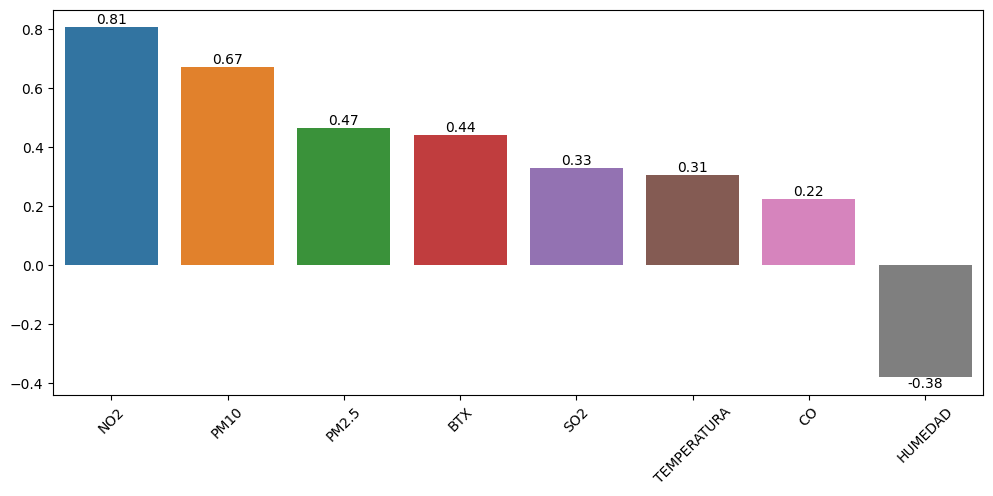

In [7]:
# Correlación con barras
df_corr =df_rel.corr() # matriz de correlación

corr_ICA = df_corr['ICA'] # filtrar correlación ICA
filter = (corr_ICA<-0.1) | (corr_ICA>0.1) # filtrar aquellas con baja correlación
corr_ICA = corr_ICA[filter]
corr_ICA = corr_ICA.sort_values(ascending=False)[1:] # ordenar descendente

plt.figure(figsize=(12,5))
ax =sns.barplot(x=corr_ICA.index, y=corr_ICA.values)
plt.xticks(rotation=45)

labels = [f'{value:.2f}' for value in corr_ICA.values] # redondear las correlaciones a dos decimales
ax.bar_label(ax.containers[0], labels= labels);

#### 4. Mapas de Calor

##### 4.1 Mapa de calor por Año y Hora

Diferenciar el índice de calidad del aire (ICA) en cada año y para cada hora.

1. Utilizamos df.pivot_table() para transformar los datos en una matriz de pivote, donde las filas representan las horas, las columnas representan los años y los valores son los índices de calidad del aire (ICA). 

2. Utilizamos sns.heatmap() para crear un mapa de calor a partir de la matriz de pivote. 

3. El mapa de calor proporciona una representación visual rápida de cómo varía el ICA en cada hora y año.

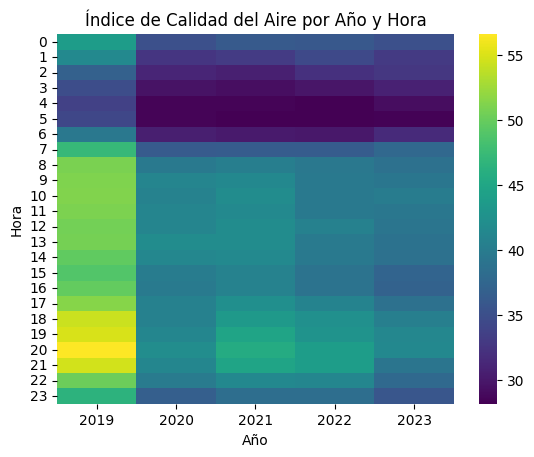

In [8]:
# Transformar los datos en una matriz de pivote
pivot_df = df.pivot_table(index='HORA', columns='ANO', values='ICA')

# Graficar el mapa de calor
sns.heatmap(data=pivot_df, cmap='viridis')

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año y Hora')
plt.xlabel('Año')
plt.ylabel('Hora')

# Mostrar el gráfico
plt.show()

##### 4.2. Mapa de calor por Año, Hora y Estación del Año

Diferenciar el índice de calidad del aire (ICA) en cada año, para cada hora y en las diferentes estaciones del año., puedes utilizar un mapa de calor (heatmap) con subplots para cada estación. Cada subplot representará una estación del año.

1. Creamos una nueva columna llamada 'ESTACION_AÑO' para agrupar los meses en estaciones del año. 

2. Utilizamos plt.subplots() para crear una cuadrícula de subplots, donde cada subplot representa una estación del año. 

3. Filtramos los datos para cada estación, creamos una matriz de pivote y graficamos un mapa de calor en cada subplot


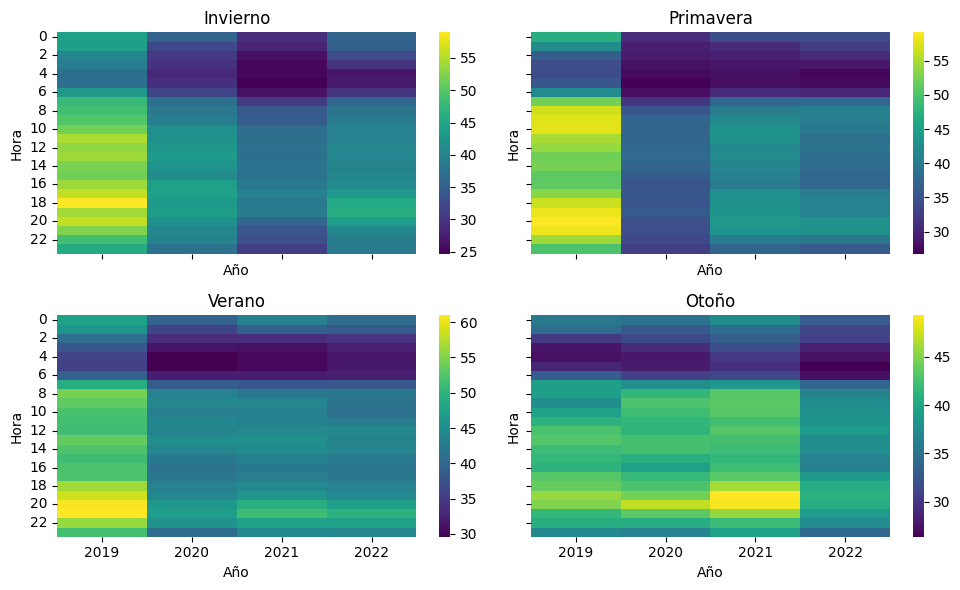

In [9]:
# Crear una nueva columna 'ESTACION_AÑO' para agrupar meses en estaciones
df['ESTACION_AÑO'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

# Crear subplots para cada estación
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

# Iterar sobre las estaciones y graficar el mapa de calor en cada subplot
for (estacion, ax) in zip(['Invierno', 'Primavera', 'Verano', 'Otoño'], axes.flatten()):
    pivot_df = df[df['ESTACION_AÑO'] == estacion].pivot_table(index='HORA', columns='ANO', values='ICA')
    sns.heatmap(data=pivot_df, cmap='viridis', ax=ax)
    ax.set_title(estacion)
    ax.set_xlabel('Año')
    ax.set_ylabel('Hora')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### 5. Gráfico pairplot

Un gráfico pairplot es una representación visual que muestra la relación entre múltiples variables en un conjunto de datos. Es una matriz de gráficos de dispersión, donde cada gráfico muestra la relación entre dos variables diferentes.

En un pairplot, cada variable del conjunto de datos se representa en el eje x y en el eje y de los gráficos. La diagonal de la matriz de gráficos muestra la distribución univariable de cada variable.

El pairplot es útil para identificar patrones, tendencias y posibles correlaciones entre las variables del conjunto de datos. Puede ayudar a visualizar la relación entre pares de variables y proporcionar información sobre la estructura general del conjunto de datos.

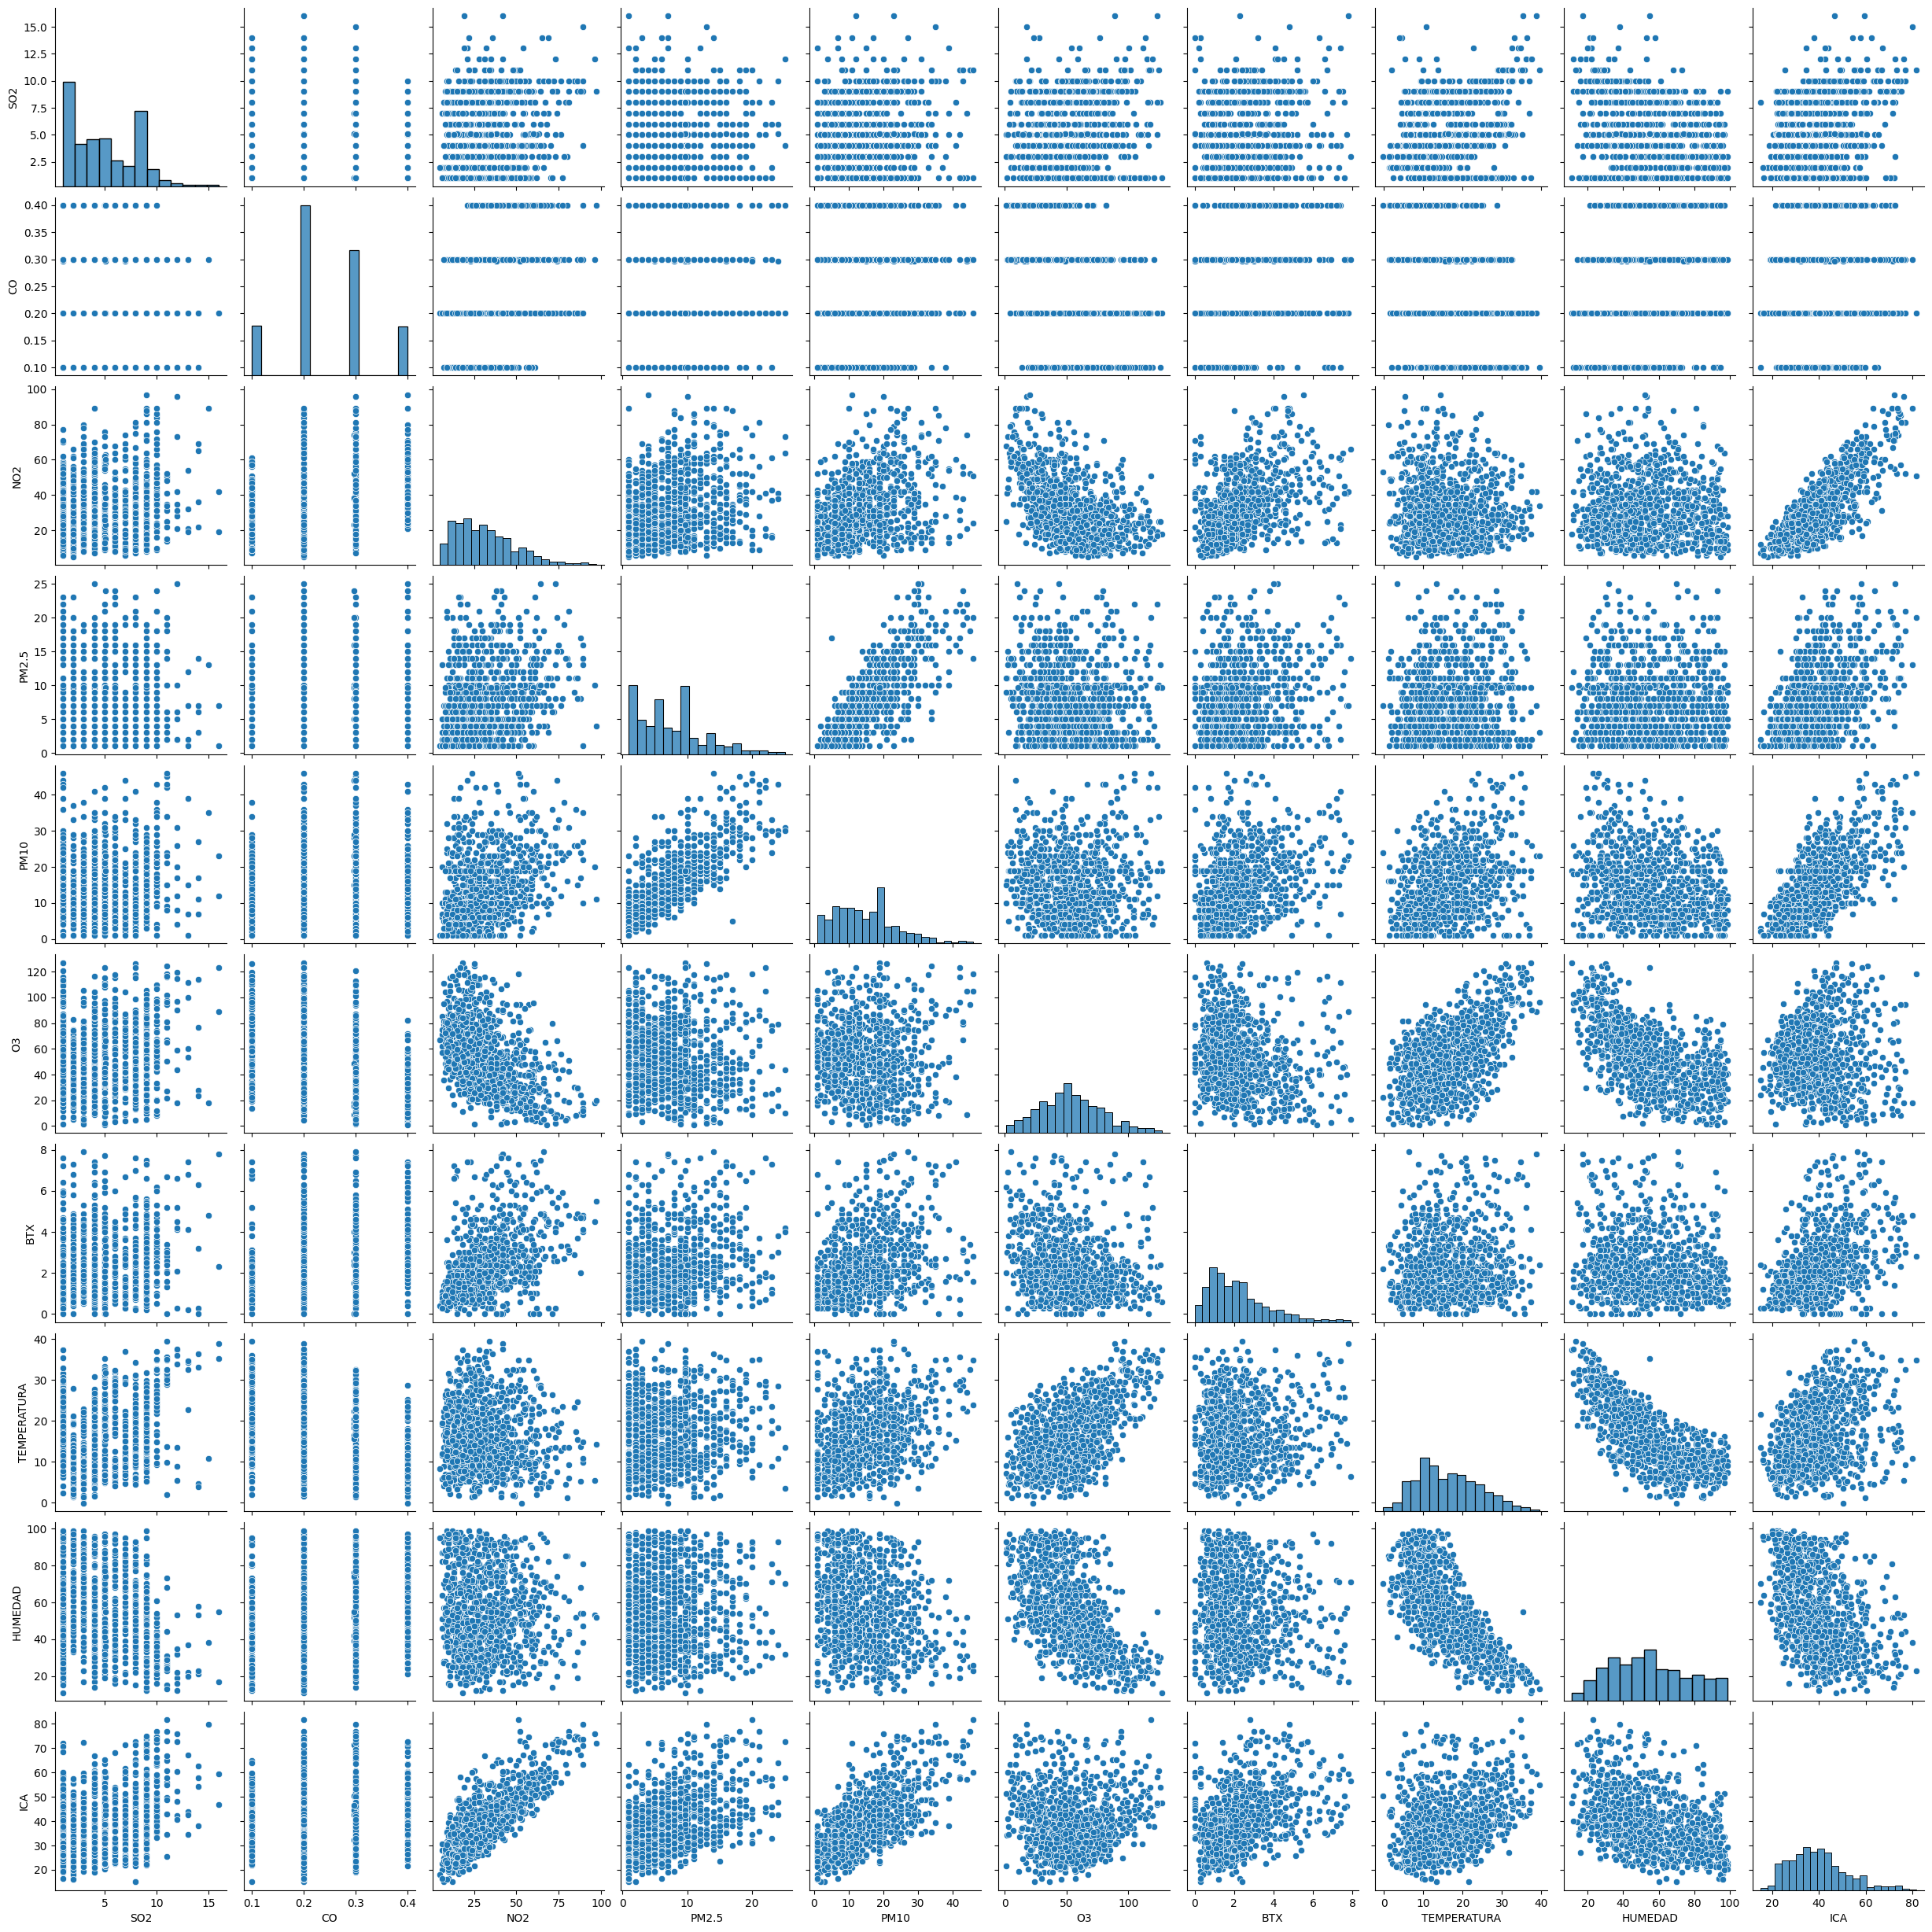

In [10]:
sns.pairplot(df_rel.sample(1000))